# Springboard Data Science Career Track Unit 4 Challenge - Tier 3 Complete

## Objectives
Hey! Great job getting through those challenging DataCamp courses. You're learning a lot in a short span of time. 

In this notebook, you're going to apply the skills you've been learning, bridging the gap between the controlled environment of DataCamp and the *slightly* messier work that data scientists do with actual datasets!

Here’s the mystery we’re going to solve: ***which boroughs of London have seen the greatest increase in housing prices, on average, over the last two decades?***


A borough is just a fancy word for district. You may be familiar with the five boroughs of New York… well, there are 32 boroughs within Greater London [(here's some info for the curious)](https://en.wikipedia.org/wiki/London_boroughs). Some of them are more desirable areas to live in, and the data will reflect that with a greater rise in housing prices.

***This is the Tier 3 notebook, which means it's not filled in at all: we'll just give you the skeleton of a project, the brief and the data. It's up to you to play around with it and see what you can find out! Good luck! If you struggle, feel free to look at easier tiers for help; but try to dip in and out of them, as the more independent work you do, the better it is for your learning!***

This challenge will make use of only what you learned in the following DataCamp courses: 
- Prework courses (Introduction to Python for Data Science, Intermediate Python for Data Science)
- Data Types for Data Science
- Python Data Science Toolbox (Part One) 
- pandas Foundations
- Manipulating DataFrames with pandas
- Merging DataFrames with pandas

Of the tools, techniques and concepts in the above DataCamp courses, this challenge should require the application of the following: 
- **pandas**
    - **data ingestion and inspection** (pandas Foundations, Module One) 
    - **exploratory data analysis** (pandas Foundations, Module Two)
    - **tidying and cleaning** (Manipulating DataFrames with pandas, Module Three) 
    - **transforming DataFrames** (Manipulating DataFrames with pandas, Module One)
    - **subsetting DataFrames with lists** (Manipulating DataFrames with pandas, Module One) 
    - **filtering DataFrames** (Manipulating DataFrames with pandas, Module One) 
    - **grouping data** (Manipulating DataFrames with pandas, Module Four) 
    - **melting data** (Manipulating DataFrames with pandas, Module Three) 
    - **advanced indexing** (Manipulating DataFrames with pandas, Module Four) 
- **matplotlib** (Intermediate Python for Data Science, Module One)
- **fundamental data types** (Data Types for Data Science, Module One) 
- **dictionaries** (Intermediate Python for Data Science, Module Two)
- **handling dates and times** (Data Types for Data Science, Module Four)
- **function definition** (Python Data Science Toolbox - Part One, Module One)
- **default arguments, variable length, and scope** (Python Data Science Toolbox - Part One, Module Two) 
- **lambda functions and error handling** (Python Data Science Toolbox - Part One, Module Four) 

## The Data Science Pipeline

This is Tier Three, so we'll get you started. But after that, it's all in your hands! When you feel done with your investigations, look back over what you've accomplished, and prepare a quick presentation of your findings for the next mentor meeting. 

Data Science is magical. In this case study, you'll get to apply some complex machine learning algorithms. But as  [David Spiegelhalter](https://www.youtube.com/watch?v=oUs1uvsz0Ok) reminds us, there is no substitute for simply **taking a really, really good look at the data.** Sometimes, this is all we need to answer our question.

Data Science projects generally adhere to the four stages of Data Science Pipeline:
1. Sourcing and loading 
2. Cleaning, transforming, and visualizing 
3. Modeling 
4. Evaluating and concluding 


### 1. Sourcing and Loading 

Any Data Science project kicks off by importing  ***pandas***. The documentation of this wonderful library can be found [here](https://pandas.pydata.org/). As you've seen, pandas is conveniently connected to the [Numpy](http://www.numpy.org/) and [Matplotlib](https://matplotlib.org/) libraries. 

***Hint:*** This part of the data science pipeline will test those skills you acquired in the pandas Foundations course, Module One. 

#### 1.1. Importing Libraries

In [1]:
# Let's import the pandas, numpy libraries as pd, and np respectively. 
import pandas as pd
import numpy as np

# Load the pyplot collection of functions from matplotlib, as plt 
from matplotlib import pyplot

# Load the ticker collection from matplotlib for ticker fine tuning:
from matplotlib.ticker import FormatStrFormatter

#### 1.2.  Loading the data
Your data comes from the [London Datastore](https://data.london.gov.uk/): a free, open-source data-sharing portal for London-oriented datasets. 

In [2]:
#conda install -c anaconda openpyxl

In [9]:
import requests
# First, make a variable called url_LondonHousePrices, and assign it the following link, enclosed in quotation-marks as a string:
# https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls

url_LondonHousePrices = "https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls"
local_file = "UK_House_price_index.xls"

# 加一个伪造浏览器的 headers
headers = {
    "User-Agent": "Mozilla/5.0"
}

# 下载文件
response = requests.get(url_LondonHousePrices, headers=headers)
with open(local_file, 'wb') as f:
    f.write(response.content)
    
# The dataset we're interested in contains the Average prices of the houses, and is actually on a particular sheet of the Excel file. 
# As a result, we need to specify the sheet name in the read_excel() method.
# Put this data into a variable called properties.  

# index_col=None: It means no column is used as the DataFrame's index. Instead, pandas will automatically generate a default integer-based index (0, 1, 2, ...).
# index_col=1: This specifies that the first column (index 0) in the CSV file will be used as the DataFrame's index.
#properties = pd.read_excel(url_LondonHousePrices, sheet_name='Average price', index_col= 1)
properties = pd.read_excel(local_file, sheet_name='Average price', index_col=0)

### 2. Cleaning, transforming, and visualizing
This second stage is arguably the most important part of any Data Science project. The first thing to do is take a proper look at the data. Cleaning forms the majority of this stage, and can be done both before or after Transformation.

The end goal of data cleaning is to have tidy data. When data is tidy: 

1. Each variable has a column.
2. Each observation forms a row.

Keep the end goal in mind as you move through this process, every step will take you closer. 



***Hint:*** This part of the data science pipeline should test those skills you acquired in: 
- Intermediate Python for data science, all modules.
- pandas Foundations, all modules. 
- Manipulating DataFrames with pandas, all modules.
- Data Types for Data Science, Module Four.
- Python Data Science Toolbox - Part One, all modules

**2.1. Exploring your data** 

Think about your pandas functions for checking out a dataframe. 

In [10]:
properties.head(10)

,City of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,Enfield,...,NORTH WEST,YORKS & THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,Unnamed: 47,England
NaT,E09000001,E09000002,E09000003,E09000004,E09000005,E09000006,E09000007,E09000008,E09000009,E09000010,...,E12000002,E12000003,E12000004,E12000005,E12000006,E12000007,E12000008,E12000009,NaN,E92000001
1995-01-01,90347,51870,98948,64956,76880,83082,119775,70118,85469,77018,...,40907,42171,43856,46470,56098,79687,64502,52799,NaN,50231
1995-02-01,81213,52513,98848,64786,77651,83068,118365,69908,86551,77698,...,40877,41912,44344,47249,55991,77913,64196,52462,NaN,50130
1995-03-01,78168,52701,97848,64366,77644,82856,119131,69666,87067,76674,...,41351,42544,43701,47345,55574,79110,64597,51716,NaN,50229
1995-04-01,76172,54618,96273,64276,78668,82525,118948,69562,87933,75880,...,41195,42934,44414,47359,55966,79708,65111,52877,NaN,50597
1995-05-01,83392,54524,95737,63995,79464,82951,118781,69800,87813,75017,...,41154,42197,44177,48234,55879,80754,65017,52793,NaN,50679
1995-06-01,93757,55200,95577,64251,80118,83806,120721,70011,87336,75779,...,41051,42725,43987,47976,55690,80941,66005,52524,NaN,50733
1995-07-01,108801,53569,96992,63721,79920,84330,122840,70102,88108,76299,...,41048,42859,44331,47746,56633,81345,65717,52375,NaN,50889
1995-08-01,110976,53691,97968,64431,79295,83471,124328,69951,88487,76724,...,41126,42461,44220,47495,56129,80858,65341,52471,NaN,50606
1995-09-01,103215,52909,98936,64508,79557,82847,119442,70356,87743,76180,...,41028,42203,44075,47228,55661,80228,64838,52354,NaN,50331


In [11]:
properties.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 363 entries, NaT to 2025-02-01
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   City of London        363 non-null    object 
 1   Barking & Dagenham    363 non-null    object 
 2   Barnet                363 non-null    object 
 3   Bexley                363 non-null    object 
 4   Brent                 363 non-null    object 
 5   Bromley               363 non-null    object 
 6   Camden                363 non-null    object 
 7   Croydon               363 non-null    object 
 8   Ealing                363 non-null    object 
 9   Enfield               363 non-null    object 
 10  Greenwich             363 non-null    object 
 11  Hackney               363 non-null    object 
 12  Hammersmith & Fulham  363 non-null    object 
 13  Haringey              363 non-null    object 
 14  Harrow                363 non-null    object 
 15  Havering   

**2.2. Cleaning the data**

You might find you need to transpose your dataframe, check out what its row indexes are, and reset the index. You  also might find you need to assign the values of the first row to your column headings  . (Hint: recall the .columns feature of DataFrames, as well as the iloc[] method).

Don't be afraid to use StackOverflow for help  with this.

In [12]:
properties_T = properties.transpose()

In [13]:
properties_T.head()

,NaT,1995-01-01,1995-02-01,1995-03-01,1995-04-01,1995-05-01,1995-06-01,1995-07-01,1995-08-01,1995-09-01,...,2024-05-01,2024-06-01,2024-07-01,2024-08-01,2024-09-01,2024-10-01,2024-11-01,2024-12-01,2025-01-01,2025-02-01
City of London,E09000001,90347,81213,78168,76172,83392,93757,108801,110976,103215,...,905952,837917,777892,778284,787421,759401,725572,807642,807469,787104
Barking & Dagenham,E09000002,51870,52513,52701,54618,54524,55200,53569,53691,52909,...,341750,335531,336359,328071,334740,342867,354748,354327,353227,363323
Barnet,E09000003,98948,98848,97848,96273,95737,95577,96992,97968,98936,...,616958,619994,624981,628093,624601,626302,627685,622984,610940,602832
Bexley,E09000004,64956,64786,64366,64276,63995,64251,63721,64431,64508,...,395593,399795,398682,404250,405628,408270,405656,404102,405583,408294
Brent,E09000005,76880,77651,77644,78668,79464,80118,79920,79295,79557,...,540597,564733,564958,576330,582362,593866,595358,576148,572675,555173


In [14]:
properties_T.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48 entries, City of London to England
Columns: 363 entries, NaT to 2025-02-01
dtypes: object(363)
memory usage: 137.5+ KB


In [15]:
properties_T.shape

(48, 363)

In [16]:
properties_T.columns.unique()

DatetimeIndex([       'NaT', '1995-01-01', '1995-02-01', '1995-03-01',
               '1995-04-01', '1995-05-01', '1995-06-01', '1995-07-01',
               '1995-08-01', '1995-09-01',
               ...
               '2024-05-01', '2024-06-01', '2024-07-01', '2024-08-01',
               '2024-09-01', '2024-10-01', '2024-11-01', '2024-12-01',
               '2025-01-01', '2025-02-01'],
              dtype='datetime64[ns]', length=363, freq=None)

In [17]:
# Give Column[0] a new label name called "ID":
# properties_T.columns[0]: Gets the name of the first column.
# rename(columns={...}, inplace=True): Renames the first column to 'ID' in place, modifying the DataFrame directly.

properties_T.rename(columns = {list(properties_T)[0]: 'ID'}, inplace = True)

In [18]:
# Check the top 5 rows of properties_T df:
properties_T.head()

,ID,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,1995-09-01 00:00:00,...,2024-05-01 00:00:00,2024-06-01 00:00:00,2024-07-01 00:00:00,2024-08-01 00:00:00,2024-09-01 00:00:00,2024-10-01 00:00:00,2024-11-01 00:00:00,2024-12-01 00:00:00,2025-01-01 00:00:00,2025-02-01 00:00:00
City of London,E09000001,90347,81213,78168,76172,83392,93757,108801,110976,103215,...,905952,837917,777892,778284,787421,759401,725572,807642,807469,787104
Barking & Dagenham,E09000002,51870,52513,52701,54618,54524,55200,53569,53691,52909,...,341750,335531,336359,328071,334740,342867,354748,354327,353227,363323
Barnet,E09000003,98948,98848,97848,96273,95737,95577,96992,97968,98936,...,616958,619994,624981,628093,624601,626302,627685,622984,610940,602832
Bexley,E09000004,64956,64786,64366,64276,63995,64251,63721,64431,64508,...,395593,399795,398682,404250,405628,408270,405656,404102,405583,408294
Brent,E09000005,76880,77651,77644,78668,79464,80118,79920,79295,79557,...,540597,564733,564958,576330,582362,593866,595358,576148,572675,555173


In [19]:
# reset the index by calling .reset_index():
# The "Districts" - "City of London" column now becomes the index, making the DataFrame more organized and easier to work with.
properties_T_1 = properties_T.reset_index()

In [20]:
properties_T_1.head()

,index,ID,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2024-05-01 00:00:00,2024-06-01 00:00:00,2024-07-01 00:00:00,2024-08-01 00:00:00,2024-09-01 00:00:00,2024-10-01 00:00:00,2024-11-01 00:00:00,2024-12-01 00:00:00,2025-01-01 00:00:00,2025-02-01 00:00:00
0,City of London,E09000001,90347,81213,78168,76172,83392,93757,108801,110976,...,905952,837917,777892,778284,787421,759401,725572,807642,807469,787104
1,Barking & Dagenham,E09000002,51870,52513,52701,54618,54524,55200,53569,53691,...,341750,335531,336359,328071,334740,342867,354748,354327,353227,363323
2,Barnet,E09000003,98948,98848,97848,96273,95737,95577,96992,97968,...,616958,619994,624981,628093,624601,626302,627685,622984,610940,602832
3,Bexley,E09000004,64956,64786,64366,64276,63995,64251,63721,64431,...,395593,399795,398682,404250,405628,408270,405656,404102,405583,408294
4,Brent,E09000005,76880,77651,77644,78668,79464,80118,79920,79295,...,540597,564733,564958,576330,582362,593866,595358,576148,572675,555173


**2.3. Cleaning the data (part 2)**

You might we have to **rename** a couple columns. How do you do this? The clue's pretty bold...

In [21]:
# Give column[0] a new label name called "District":
# properties_T_1.rename(columns={properties_T_1.columns[0]: 'Districts'}, inplace=True)
properties_T_1.rename(columns = {list(properties_T_1)[0]: 'Districts'}, inplace = True)

In [22]:
properties_T_1.head()

,Districts,ID,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2024-05-01 00:00:00,2024-06-01 00:00:00,2024-07-01 00:00:00,2024-08-01 00:00:00,2024-09-01 00:00:00,2024-10-01 00:00:00,2024-11-01 00:00:00,2024-12-01 00:00:00,2025-01-01 00:00:00,2025-02-01 00:00:00
0,City of London,E09000001,90347,81213,78168,76172,83392,93757,108801,110976,...,905952,837917,777892,778284,787421,759401,725572,807642,807469,787104
1,Barking & Dagenham,E09000002,51870,52513,52701,54618,54524,55200,53569,53691,...,341750,335531,336359,328071,334740,342867,354748,354327,353227,363323
2,Barnet,E09000003,98948,98848,97848,96273,95737,95577,96992,97968,...,616958,619994,624981,628093,624601,626302,627685,622984,610940,602832
3,Bexley,E09000004,64956,64786,64366,64276,63995,64251,63721,64431,...,395593,399795,398682,404250,405628,408270,405656,404102,405583,408294
4,Brent,E09000005,76880,77651,77644,78668,79464,80118,79920,79295,...,540597,564733,564958,576330,582362,593866,595358,576148,572675,555173


In [23]:
properties_T_1.tail()

,Districts,ID,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2024-05-01 00:00:00,2024-06-01 00:00:00,2024-07-01 00:00:00,2024-08-01 00:00:00,2024-09-01 00:00:00,2024-10-01 00:00:00,2024-11-01 00:00:00,2024-12-01 00:00:00,2025-01-01 00:00:00,2025-02-01 00:00:00
43,LONDON,E12000007,79687,77913,79110,79708,80754,80941,81345,80858,...,553898,555368,558333,569172,568843,560278,558798,553418,562073,555625
44,SOUTH EAST,E12000008,64502,64196,64597,65111,65017,66005,65717,65341,...,372648,374224,378129,383291,382431,382958,381426,384454,385700,384659
45,SOUTH WEST,E12000009,52799,52462,51716,52877,52793,52524,52375,52471,...,299725,297872,303135,303988,306785,311594,306075,307115,306188,308207
46,Unnamed: 47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47,England,E92000001,50231,50130,50229,50597,50679,50733,50889,50606,...,281363,282226,285157,288725,289445,290011,290393,290792,290709,291640


**2.4.Transforming the data**

Remember what Wes McKinney said about tidy data? 

You might need to **melt** your DataFrame here. 

In [24]:
# Pivot table from longitude to latitude
clean_properties = pd.melt(properties_T_1, id_vars=['Districts', 'ID'], var_name='Date', value_name='Price')

Remember to make sure your column data types are all correct. Average prices, for example, should be floating point numbers... 

In [25]:
clean_properties.head()

,Districts,ID,Date,Price
0,City of London,E09000001,1995-01-01,90347
1,Barking & Dagenham,E09000002,1995-01-01,51870
2,Barnet,E09000003,1995-01-01,98948
3,Bexley,E09000004,1995-01-01,64956
4,Brent,E09000005,1995-01-01,76880


**2.5. Cleaning the data (part 3)**

Do we have an equal number of observations in the ID, Average Price, Month, and London Borough columns? Remember that there are only 32 London Boroughs. How many entries do you have in that column? 

Check out the contents of the London Borough column, and if you find null values, get rid of them however you see fit. 

In [26]:
# Check the summary of clean_properties df:
clean_properties.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17376 entries, 0 to 17375
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Districts  17376 non-null  object        
 1   ID         16290 non-null  object        
 2   Date       17376 non-null  datetime64[ns]
 3   Price      16290 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 543.1+ KB


In [27]:
clean_properties.shape

(17376, 4)

In [28]:
# As shown in the summary table, Price column are all object so this needs to be converted into a float: first, create a multi-index, including 'Date', 'Districts', 'ID'
clean_properties_index = clean_properties.set_index(['Date', 'Districts', 'ID'])

In [29]:
clean_properties_float = clean_properties_index.apply(pd.to_numeric)

In [30]:
clean_properties_float.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 17376 entries, (Timestamp('1995-01-01 00:00:00'), 'City of London', 'E09000001') to (Timestamp('2025-02-01 00:00:00'), 'England', 'E92000001')
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   16290 non-null  float64
dtypes: float64(1)
memory usage: 217.5+ KB


In [31]:
clean_properties_index.head()

Price
Date       Districts          ID              
1995-01-01 City of London     E09000001  90347
           Barking & Dagenham E09000002  51870
           Barnet             E09000003  98948
           Bexley             E09000004  64956
           Brent              E09000005  76880

In [32]:
# Reset the index:
clean_properties_f_1 = clean_properties_float.reset_index()

In [33]:
# Check the top 5 rows of clean_properties_f_1 df:
clean_properties_f_1.head()

,Date,Districts,ID,Price
0,1995-01-01,City of London,E09000001,90347.0
1,1995-01-01,Barking & Dagenham,E09000002,51870.0
2,1995-01-01,Barnet,E09000003,98948.0
3,1995-01-01,Bexley,E09000004,64956.0
4,1995-01-01,Brent,E09000005,76880.0


In [34]:
# Check the unique columns labels to see which columns are part of London Borough:
clean_properties_f_1['Districts'].unique()

array(['City of London', 'Barking & Dagenham', 'Barnet', 'Bexley',
       'Brent', 'Bromley', 'Camden', 'Croydon', 'Ealing', 'Enfield',
       'Greenwich', 'Hackney', 'Hammersmith & Fulham', 'Haringey',
       'Harrow', 'Havering', 'Hillingdon', 'Hounslow', 'Islington',
       'Kensington & Chelsea', 'Kingston upon Thames', 'Lambeth',
       'Lewisham', 'Merton', 'Newham', 'Redbridge',
       'Richmond upon Thames', 'Southwark', 'Sutton', 'Tower Hamlets',
       'Waltham Forest', 'Wandsworth', 'Westminster', 'Unnamed: 34',
       'Inner London', 'Outer London', 'Unnamed: 37', 'NORTH EAST',
       'NORTH WEST', 'YORKS & THE HUMBER', 'EAST MIDLANDS',
       'WEST MIDLANDS', 'EAST OF ENGLAND', 'LONDON', 'SOUTH EAST',
       'SOUTH WEST', 'Unnamed: 47', 'England'], dtype=object)

In [35]:
# Assign Non-London-Borough to the Boroughs which are not part of london Borough:
Non_London_Borough = ['City of London', 'Inner London', 'Outer London', 'NORTH EAST',
       'NORTH WEST', 'YORKS & THE HUMBER', 'EAST MIDLANDS',
       'WEST MIDLANDS', 'EAST OF ENGLAND', 'LONDON', 'SOUTH EAST',
       'SOUTH WEST', 'England']

In [36]:
# Drop Non_London_Borough from clean_properties_f_1 using .isin() and keeping only the London Borough = 32
clean_properties_f_2 = clean_properties_f_1[~clean_properties_f_1.Districts.isin(Non_London_Borough)]

In [37]:
# Confirm that we have now only the London Borough = 32
clean_properties_f_2['Districts'].unique()

array(['Barking & Dagenham', 'Barnet', 'Bexley', 'Brent', 'Bromley',
       'Camden', 'Croydon', 'Ealing', 'Enfield', 'Greenwich', 'Hackney',
       'Hammersmith & Fulham', 'Haringey', 'Harrow', 'Havering',
       'Hillingdon', 'Hounslow', 'Islington', 'Kensington & Chelsea',
       'Kingston upon Thames', 'Lambeth', 'Lewisham', 'Merton', 'Newham',
       'Redbridge', 'Richmond upon Thames', 'Southwark', 'Sutton',
       'Tower Hamlets', 'Waltham Forest', 'Wandsworth', 'Westminster',
       'Unnamed: 34', 'Unnamed: 37', 'Unnamed: 47'], dtype=object)

In [38]:
# Check the NaN columns:
clean_properties_f_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12670 entries, 1 to 17374
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       12670 non-null  datetime64[ns]
 1   Districts  12670 non-null  object        
 2   ID         11584 non-null  object        
 3   Price      11584 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 494.9+ KB


In [39]:
# Drops all NaN columns using .dropna() method:
clean_properties_drop_NaN = clean_properties_f_2.dropna(how = 'any')

In [40]:
# Confirm that we have no NaN columns & we have only 32 boroughs:
clean_properties_drop_NaN['Districts'].unique()

array(['Barking & Dagenham', 'Barnet', 'Bexley', 'Brent', 'Bromley',
       'Camden', 'Croydon', 'Ealing', 'Enfield', 'Greenwich', 'Hackney',
       'Hammersmith & Fulham', 'Haringey', 'Harrow', 'Havering',
       'Hillingdon', 'Hounslow', 'Islington', 'Kensington & Chelsea',
       'Kingston upon Thames', 'Lambeth', 'Lewisham', 'Merton', 'Newham',
       'Redbridge', 'Richmond upon Thames', 'Southwark', 'Sutton',
       'Tower Hamlets', 'Waltham Forest', 'Wandsworth', 'Westminster'],
      dtype=object)

In [41]:
# Assign clean_properties_drop_NaN to df:
df = clean_properties_drop_NaN
df.head()

,Date,Districts,ID,Price
1,1995-01-01,Barking & Dagenham,E09000002,51870.0
2,1995-01-01,Barnet,E09000003,98948.0
3,1995-01-01,Bexley,E09000004,64956.0
4,1995-01-01,Brent,E09000005,76880.0
5,1995-01-01,Bromley,E09000006,83082.0


In [42]:
# Let's rename 'Date' as 'Month' and 'Price' as 'Average_Price'
df.rename(columns = {list(df)[0]: 'Month', list(df)[3]:'Average_Price'}, inplace = True)

/Users/thehoop/miniforge3/envs/odbc_env/lib/python3.10/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [43]:
df.head()

,Month,Districts,ID,Average_Price
1,1995-01-01,Barking & Dagenham,E09000002,51870.0
2,1995-01-01,Barnet,E09000003,98948.0
3,1995-01-01,Bexley,E09000004,64956.0
4,1995-01-01,Brent,E09000005,76880.0
5,1995-01-01,Bromley,E09000006,83082.0


**2.6. Visualizing the data**

To visualize the data, why not subset on a particular London Borough? Maybe do a line plot of Month against Average Price?

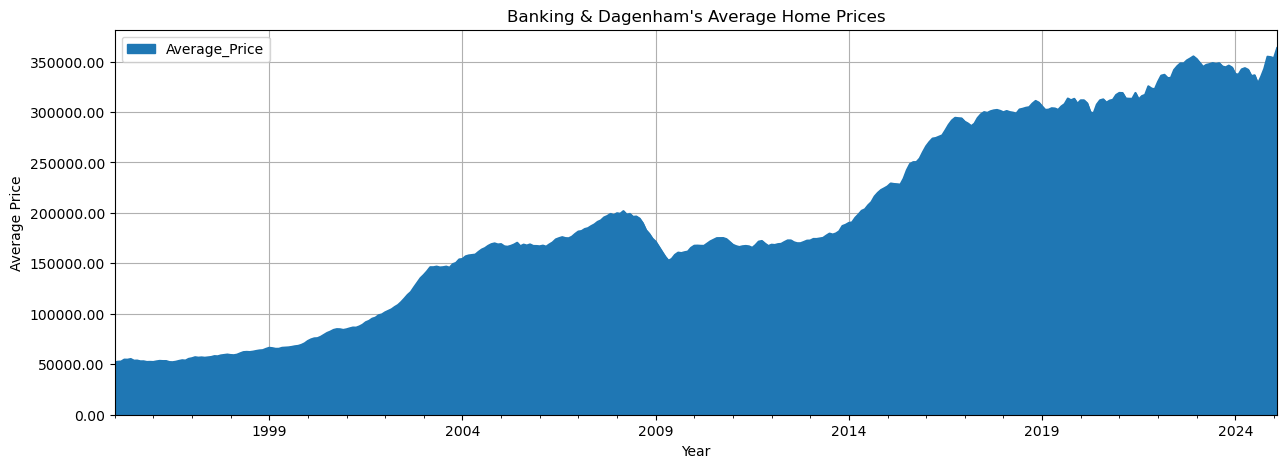

In [44]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

ax1 = df[df['Districts'] == "Barking & Dagenham"].plot(kind='area', x='Month', y='Average_Price', figsize=(15, 5), grid=True)
plt.title("Banking & Dagenham's Average Home Prices")
plt.ylabel("Average Price")
plt.xlabel("Year")
# Ensures that the grid lines appear below the plot elements for better clarity.
ax1.set_axisbelow(True)
ax1.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.show()

To limit the number of data points you have, you might want to extract the year from every month value your *Month* column. 

To this end, you *could* apply a ***lambda function***. Your logic could work as follows:
1. look through the `Month` column
2. extract the year from each individual value in that column 
3. store that corresponding year as separate column. 

Whether you go ahead with this is up to you. Just so long as you answer our initial brief: which boroughs of London have seen the greatest house price increase, on average, over the past two decades? 

In [45]:
df['Year'] = df['Month'].apply(lambda t: t.year)

/var/folders/qn/7_ssbz356pz3h_klfys0777m0000gn/T/ipykernel_4636/3140778947.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['Month'].apply(lambda t: t.year)


In [46]:
df.head()

,Month,Districts,ID,Average_Price,Year
1,1995-01-01,Barking & Dagenham,E09000002,51870.0,1995
2,1995-01-01,Barnet,E09000003,98948.0,1995
3,1995-01-01,Bexley,E09000004,64956.0,1995
4,1995-01-01,Brent,E09000005,76880.0,1995
5,1995-01-01,Bromley,E09000006,83082.0,1995


In [47]:
# Using the function 'groupby' will help you to calculate the mean for each year and for each Borough
## The variables Borough and Year are now indexs
dfg = df.groupby(by=['Districts', 'Year'])['Average_Price'].mean()
dfg.sample(10)

Districts             Year
Hounslow              2004    245137.416667
Wandsworth            1997    124035.916667
Newham                2022    419919.750000
Brent                 2009    285066.500000
Tower Hamlets         2025    503170.500000
Brent                 2024    566718.333333
Richmond upon Thames  2015    656400.333333
Southwark             2012    382195.166667
Hillingdon            2009    234409.583333
Southwark             2002    213168.916667
Name: Average_Price, dtype: float64

In [48]:
dfg.head()

Districts           Year
Barking & Dagenham  1995    53265.416667
                    1996    53162.666667
                    1997    57537.583333
                    1998    61969.666667
                    1999    67145.333333
Name: Average_Price, dtype: float64

In [49]:
dfg = dfg.reset_index()
dfg.head()

,Districts,Year,Average_Price
0,Barking & Dagenham,1995,53265.416667
1,Barking & Dagenham,1996,53162.666667
2,Barking & Dagenham,1997,57537.583333
3,Barking & Dagenham,1998,61969.666667
4,Barking & Dagenham,1999,67145.333333


In [50]:
# Slicing dfg to have more understanding of the df:
dfg[(dfg['Districts'] == 'Kensington & Chelsea') & (dfg['Year'] == 1995)]

,Districts,Year,Average_Price
558,Kensington & Chelsea,1995,208670.666667


In [51]:
dfg[(dfg['Districts'] == 'Kensington & Chelsea') & (dfg['Year'] == 2018)]

,Districts,Year,Average_Price
581,Kensington & Chelsea,2018,1475627.75


**3. Modeling**

Consider creating a function that will calculate a ratio of house prices, comparing the price of a house in 2018 to the price in 1998.

Consider calling this function create_price_ratio.

You'd want this function to:
1. Take a filter of dfg, specifically where this filter constrains the London_Borough, as an argument. For example, one admissible argument should be: dfg[dfg['London_Borough']=='Camden'].
2. Get the Average Price for that Borough, for the years 1998 and 2018.
4. Calculate the ratio of the Average Price for 1998 divided by the Average Price for 2018.
5. Return that ratio.

Once you've written this function, you ultimately want to use it to iterate through all the unique London_Boroughs and work out the ratio capturing the difference of house prices between 1998 and 2018.

Bear in mind: you don't have to write a function like this if you don't want to. If you can solve the brief otherwise, then great! 

***Hint***: This section should test the skills you acquired in:
- Python Data Science Toolbox - Part One, all modules

In [52]:
# Here's where you should write your function:
def create_price_ratio(d):
    y1998 = float(d['Average_Price'][d['Year'] == 1998])
    y2018 = float(d['Average_Price'][d['Year'] == 2018])
    ratio = [y1998/y2018]
    
    # ratio: The entire list.
    # ratio[0]: The first element of the list.
    return ratio[0]

In [53]:
# Test out the function by calling it with the following argument:
# dfg[dfg['London_Borough'] == 'Barking & Dagenham']
ratio = create_price_ratio(dfg[dfg['Districts'] == 'Barking & Dagenham']) * 100
rounded_perc = round(ratio, 2)
print(rounded_perc, "%")

20.42 %


In [54]:
dfg[dfg['Districts']=='Barking & Dagenham']

,Districts,Year,Average_Price
0,Barking & Dagenham,1995,53265.416667
1,Barking & Dagenham,1996,53162.666667
2,Barking & Dagenham,1997,57537.583333
3,Barking & Dagenham,1998,61969.666667
4,Barking & Dagenham,1999,67145.333333
5,Barking & Dagenham,2000,79715.500000
6,Barking & Dagenham,2001,91140.250000
7,Barking & Dagenham,2002,115356.250000
8,Barking & Dagenham,2003,146478.750000
9,Barking & Dagenham,2004,162593.666667


In [55]:
# We want to do this for all the London Boroughs.
# First, let's make an empty dictionary, called final, where we'll store our ratios for each unique borough
final = {}

In [56]:
# Now let's declare a for loop that will iterate through each of the unique elements of the 'London Borough' column of our DataFrame dfg
# Call the iterator variable 'b'

for b in dfg['Districts'].unique():
    # subset dfg on 'London_Borough' == b
    borough = dfg[dfg['Districts'] == b]
    # Make a new entry in the final dictionary whose value's the result of calling create_price_ratio with the argument: borough
    final[b] = create_price_ratio(borough) * 100
    
print(final)

{'Barking & Dagenham': 20.423085648121447, 'Barnet': 22.947455739173485, 'Bexley': 23.530347343041925, 'Brent': 20.427095111303732, 'Bromley': 24.420951547316044, 'Camden': 20.26735627889133, 'Croydon': 23.80391114911231, 'Ealing': 23.192306400619504, 'Enfield': 23.459076890446724, 'Greenwich': 20.992657248589605, 'Hackney': 16.133368258111872, 'Hammersmith & Fulham': 24.160770686044685, 'Haringey': 19.47589860903206, 'Harrow': 24.635696204346104, 'Havering': 23.11674741774039, 'Hillingdon': 23.807905579139362, 'Hounslow': 25.14409504391468, 'Islington': 20.653152795079478, 'Kensington & Chelsea': 19.676620114162713, 'Kingston upon Thames': 23.418985104353574, 'Lambeth': 20.168618083100256, 'Lewisham': 18.35560780718766, 'Merton': 21.074127656145354, 'Newham': 18.840695888908257, 'Redbridge': 22.370449143904523, 'Richmond upon Thames': 24.982768681212477, 'Southwark': 18.12786183822888, 'Sutton': 24.27845533535025, 'Tower Hamlets': 21.613517706081296, 'Waltham Forest': 17.1375836032930

In [57]:
# series = pd.Series(final, name = 'Ratio')
# df_ratios = series.to_frame()

df_ratios = pd.DataFrame.from_dict(final, orient='index', columns=['Ratio'])
df_ratios.index.name = 'District'

# Calculate the ratio
df_ratios['Ratio'] = df_ratios['Ratio'].apply(lambda x: f"{x: .2f}%")

df_ratios.sort_values(by='Ratio', ascending=False, inplace=True)

print(df_ratios)

                        Ratio
District                     
Hounslow               25.14%
Richmond upon Thames   24.98%
Harrow                 24.64%
Bromley                24.42%
Sutton                 24.28%
Hammersmith & Fulham   24.16%
Hillingdon             23.81%
Croydon                23.80%
Bexley                 23.53%
Enfield                23.46%
Kingston upon Thames   23.42%
Ealing                 23.19%
Havering               23.12%
Barnet                 22.95%
Redbridge              22.37%
Tower Hamlets          21.61%
Merton                 21.07%
Wandsworth             21.02%
Greenwich              20.99%
Islington              20.65%
Brent                  20.43%
Barking & Dagenham     20.42%
Camden                 20.27%
Lambeth                20.17%
Kensington & Chelsea   19.68%
Haringey               19.48%
Newham                 18.84%
Westminster            18.68%
Lewisham               18.36%
Southwark              18.13%
Waltham Forest         17.14%
Hackney   

In [58]:
df_ratios = pd.DataFrame(df_ratios)
df_ratios

,Ratio
District,
Hounslow,25.14%
Richmond upon Thames,24.98%
Harrow,24.64%
Bromley,24.42%
Sutton,24.28%
Hammersmith & Fulham,24.16%
Hillingdon,23.81%
Croydon,23.80%
Bexley,23.53%


In [59]:
# # Remove the '%' symbol
# df_ratios['Ratio'] = df_ratios['Ratio'].str.replace('%', '')

# # Convert the 'Ratio' column to numeric
# df_ratios['Ratio'] = pd.to_numeric(df_ratios['Ratio'])

# # Now you can plot the bar chart
# df_ratios.plot.bar(figsize=(12, 6), rot=45)

In [60]:
print(df_ratios['Ratio'].dtype)

object


In [61]:
# df_ratios.plot.bar(figsize=(20, 6), rot=45, cmap='viridis')
# plt.title('Ratio by District')
# plt.xlabel('District')
# plt.ylabel('Ratio %')
# plt.show()

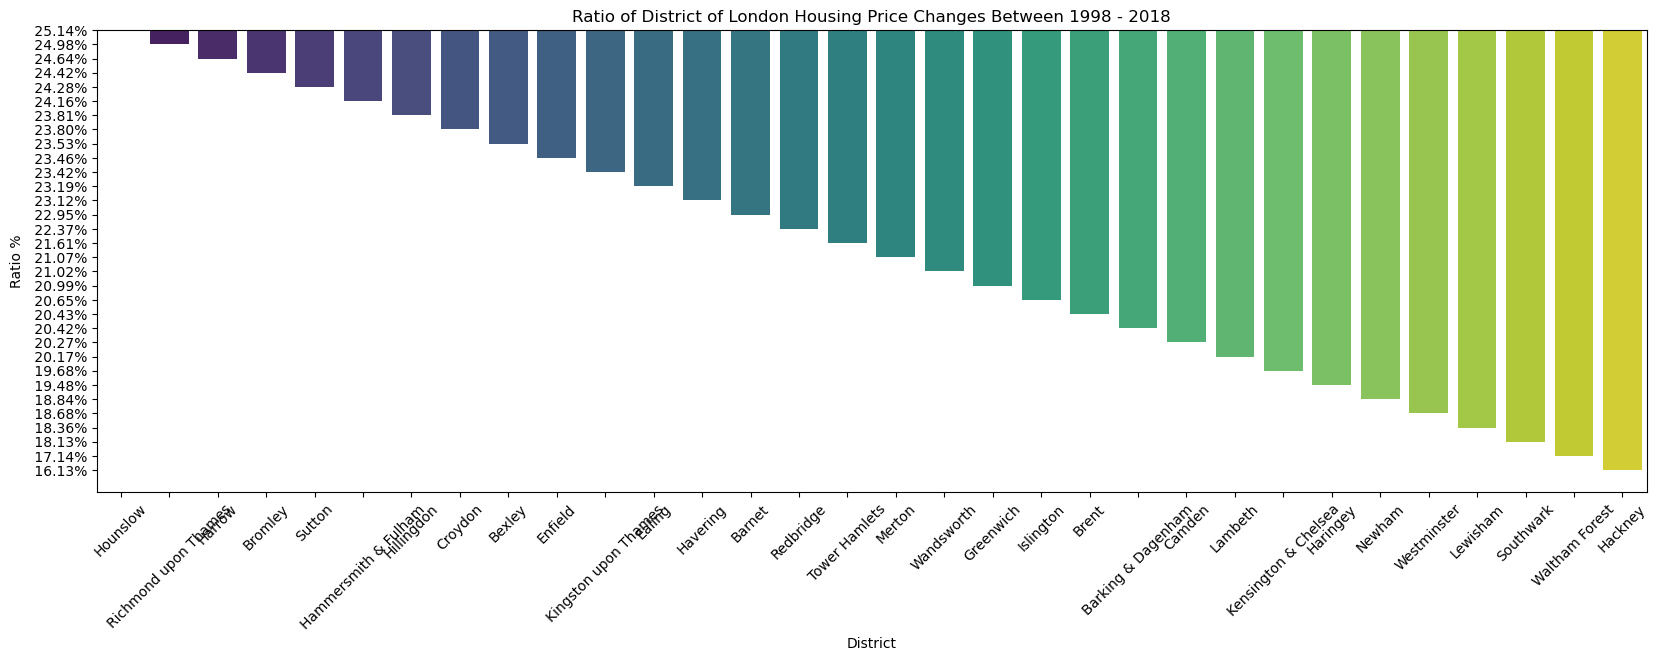

In [62]:
import warnings
import seaborn as sns

warnings.simplefilter(action='ignore', category=FutureWarning)

plt.figure(figsize=(20, 6))

sns.barplot(x=df_ratios.index, y='Ratio', data=df_ratios, palette='viridis')
plt.xticks(rotation=45)
plt.title('Ratio of District of London Housing Price Changes Between 1998 - 2018')
plt.ylabel('Ratio %')
plt.show()

### 4. Conclusion
What can you conclude? Type out your conclusion below. 

Look back at your notebook. Think about how you might summarize what you have done, and prepare a quick presentation on it to your mentor at your next meeting. 

We hope you enjoyed this practical project. It should have consolidated your data hygiene and pandas skills by looking at a real-world problem involving just the kind of dataset you might encounter as a budding data scientist. Congratulations, and looking forward to seeing you at the next step in the course! 

The bar plot effectively visualizes the relative changes in housing prices across different London districts. The height of each bar represents the ratio of the average house price in 2018 to the average price in 1998. Districts with higher bars experienced greater price increases.

Key Insights:
- Hounslow and Richmond upon Thames had the highest price increases, indicating significant growth in these areas.
- Hackney and Waltham Forest had the lowest price increases, suggesting relatively slower growth.

Historical data indicates a consistent upward trend in average housing prices across most London boroughs, including Barking & Dagenham.

In [63]:
dfg[dfg['Districts'] == "Barking & Dagenham"]

,Districts,Year,Average_Price
0,Barking & Dagenham,1995,53265.416667
1,Barking & Dagenham,1996,53162.666667
2,Barking & Dagenham,1997,57537.583333
3,Barking & Dagenham,1998,61969.666667
4,Barking & Dagenham,1999,67145.333333
5,Barking & Dagenham,2000,79715.500000
6,Barking & Dagenham,2001,91140.250000
7,Barking & Dagenham,2002,115356.250000
8,Barking & Dagenham,2003,146478.750000
9,Barking & Dagenham,2004,162593.666667


In [64]:
avg_price = dfg.set_index('Year')
pivot = avg_price.pivot_table(index='Year', columns='Districts', values='Average_Price')
pivot.head()

Districts,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,Enfield,Greenwich,...,Merton,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster
Year,,,,,,,,,,,,,,,,,,,,,
1995,53265.416667,97365.083333,64289.750000,78737.416667,83382.916667,119215.083333,69879.750000,86895.000000,76454.666667,66935.000000,...,86053.666667,57020.333333,71293.333333,116573.750000,74171.083333,71061.583333,69873.333333,63274.416667,101916.500000,142123.083333
1996,53162.666667,99707.000000,65488.666667,81116.083333,84990.333333,132529.500000,70681.416667,89217.916667,78661.416667,68832.583333,...,89793.333333,58245.750000,74022.250000,124440.333333,80931.916667,72437.166667,76945.250000,64201.000000,105864.250000,147969.416667
1997,57537.583333,113371.833333,70787.583333,93529.000000,95852.000000,148705.500000,78752.166667,104641.250000,88802.000000,76098.500000,...,102300.666667,63704.500000,81893.416667,144964.916667,92022.416667,81982.833333,94141.166667,70449.500000,124035.916667,175884.666667
1998,61969.666667,129787.750000,80629.833333,108562.333333,110156.583333,169054.916667,89366.250000,119124.750000,98807.833333,86092.916667,...,115503.166667,70704.500000,92838.333333,172864.000000,105503.083333,93096.000000,105937.000000,78016.750000,143883.166667,202551.666667
1999,67145.333333,144261.083333,86775.333333,120923.166667,122961.666667,189261.250000,98521.750000,135103.833333,108320.583333,95962.000000,...,130310.250000,77865.916667,101114.833333,192824.333333,127274.583333,101975.416667,124082.666667,86549.833333,166752.750000,227545.583333


In [65]:
# df
df_avgP = df.groupby(by=['Districts'])['Average_Price'].mean().sort_values(ascending=False)
top15_avgP = df_avgP.head(15)
top15_avgP

top15 = top15_avgP.index.tolist()

df_top15 = df[df['Districts'].isin(top15)]
df_top15

,Month,Districts,ID,Average_Price,Year
2,1995-01-01,Barnet,E09000003,98948.0,1995
6,1995-01-01,Camden,E09000007,119775.0,1995
8,1995-01-01,Ealing,E09000009,85469.0,1995
11,1995-01-01,Hackney,E09000012,63375.0,1995
12,1995-01-01,Hammersmith & Fulham,E09000013,129363.0,1995
...,...,...,...,...,...
17351,2025-02-01,Merton,E09000024,619145.0,2025
17354,2025-02-01,Richmond upon Thames,E09000027,788485.0,2025
17355,2025-02-01,Southwark,E09000028,583935.0,2025
17359,2025-02-01,Wandsworth,E09000032,710541.0,2025


In [66]:
medianP = df_top15.groupby('Districts')['Average_Price'].median().sort_values(ascending=False)
medianP_districts = medianP.index.tolist()

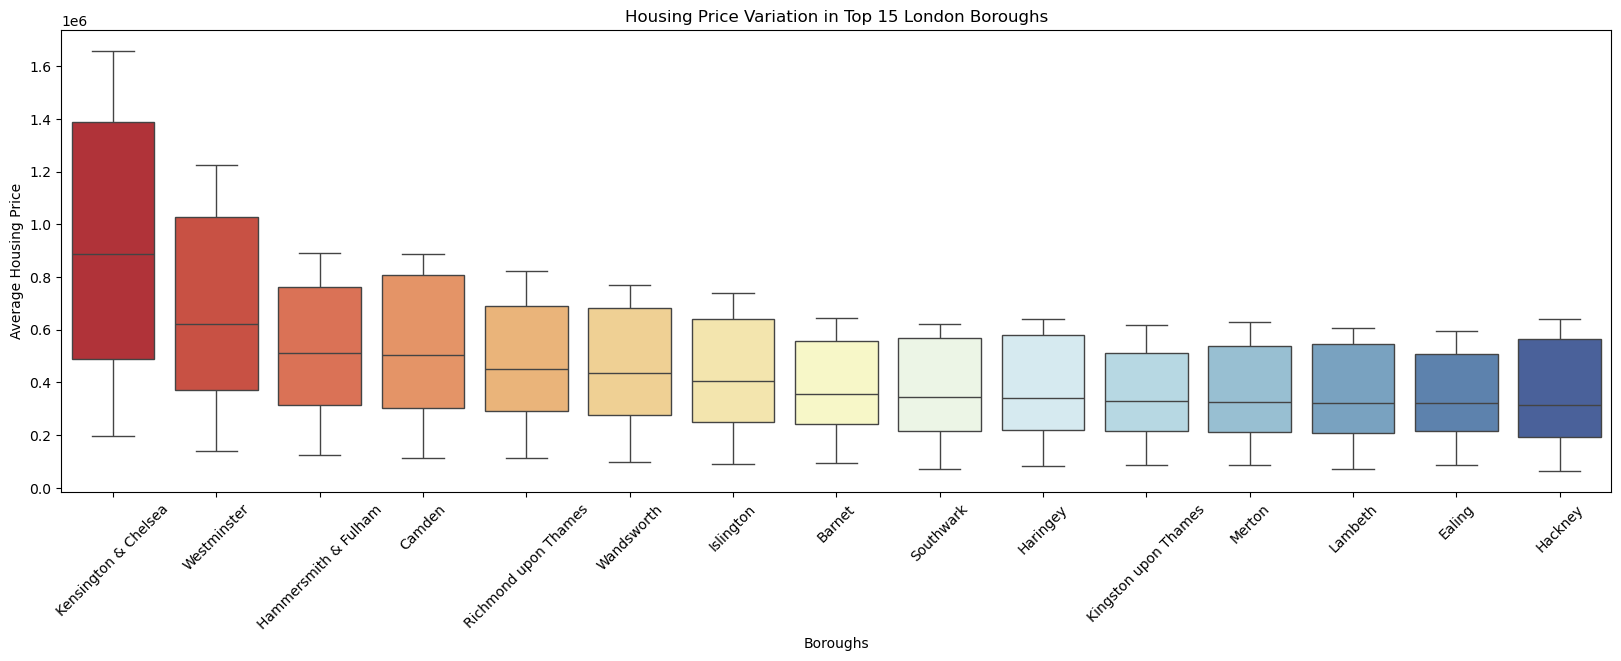

In [67]:
plt.figure(figsize=(20, 6))

sns.boxplot(x='Districts', y='Average_Price', data=df_top15, palette='RdYlBu', order=medianP_districts)
plt.xticks(rotation = 45)
plt.xlabel('Boroughs')
plt.ylabel('Average Housing Price')
plt.title("Housing Price Variation in Top 15 London Boroughs")

plt.show()

Out of all 32 London boroughs total, these boroughs are the top 15 ones. The boxplot visually confirms that there is a wide vairation in average housing prices across the top 15 London boroughs. The boroughs are ordered from left to right based on their median housing prices, with Kensington & Chelsea having the highest median and Southwark having the lowest.